In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [4]:
df = pd.read_csv('data/pokemon.csv')
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [7]:
df_num = df.select_dtypes(include='int')
df_num.head()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,1,318,45,49,49,65,65,45,1
1,2,405,60,62,63,80,80,60,1
2,3,525,80,82,83,100,100,80,1
3,3,625,80,100,123,122,120,80,1
4,4,309,39,52,43,60,50,65,1


In [8]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   #           800 non-null    int64
 1   Total       800 non-null    int64
 2   HP          800 non-null    int64
 3   Attack      800 non-null    int64
 4   Defense     800 non-null    int64
 5   Sp. Atk     800 non-null    int64
 6   Sp. Def     800 non-null    int64
 7   Speed       800 non-null    int64
 8   Generation  800 non-null    int64
dtypes: int64(9)
memory usage: 56.4 KB


In [16]:
df_num = df_num.drop(['#', 'Generation'], axis=1)
df_num.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,318,45,49,49,65,65,45
1,405,60,62,63,80,80,60
2,525,80,82,83,100,100,80
3,625,80,100,123,122,120,80
4,309,39,52,43,60,50,65


In [17]:
df_num.isna().sum()

Total      0
HP         0
Attack     0
Defense    0
Sp. Atk    0
Sp. Def    0
Speed      0
dtype: int64

In [18]:
# Build the pipeline
pipe = Pipeline([('scaler', StandardScaler()),
        		 ('reducer', PCA(n_components=2))])

# Fit it to the dataset and extract the component vectors
pipe.fit(df_num)
vectors = pipe['reducer'].components_.round(2)

# Print feature effects
print('PC 1 effects = ' + str(dict(zip(df_num.columns, vectors[0]))))
print('PC 2 effects = ' + str(dict(zip(df_num.columns, vectors[1]))))

PC 1 effects = {'Total': 0.52, 'HP': 0.33, 'Attack': 0.38, 'Defense': 0.31, 'Sp. Atk': 0.39, 'Sp. Def': 0.38, 'Speed': 0.29}
PC 2 effects = {'Total': -0.01, 'HP': 0.09, 'Attack': -0.01, 'Defense': 0.63, 'Sp. Atk': -0.3, 'Sp. Def': 0.24, 'Speed': -0.67}


# PCA for feature exploration

In [20]:
df_cat = df.select_dtypes(exclude='int')
df_cat.head()

,Name,Type 1,Type 2,Legendary
0,Bulbasaur,Grass,Poison,False
1,Ivysaur,Grass,Poison,False
2,Venusaur,Grass,Poison,False
3,VenusaurMega Venusaur,Grass,Poison,False
4,Charmander,Fire,NaN,False


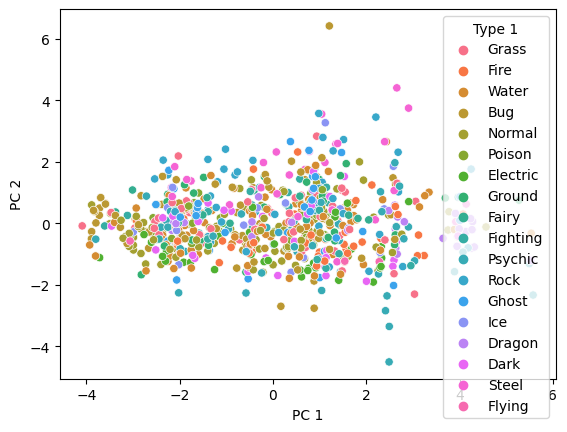

In [22]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA(n_components=2))])

# Fit the pipeline to poke_df and transform the data
pc = pipe.fit_transform(df_num)

# Add the 2 components to poke_cat_df
df_cat['PC 1'] = pc[:, 0]
df_cat['PC 2'] = pc[:, 1]

# Use the Type feature to color the PC 1 vs. PC 2 scatterplot
sns.scatterplot(data=df_cat, x='PC 1', y='PC 2', hue='Type 1')
plt.show()

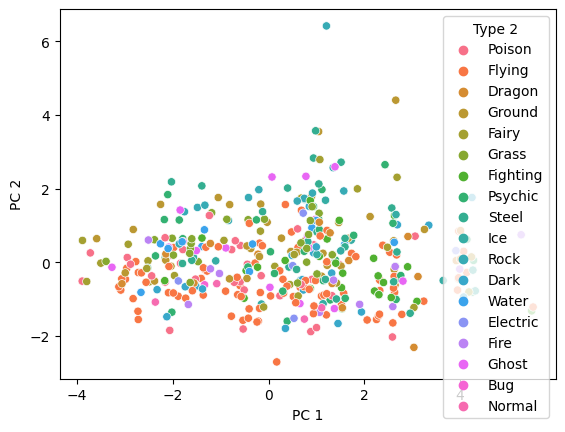

In [23]:
# Use the Type feature to color the PC 1 vs. PC 2 scatterplot
sns.scatterplot(data=df_cat, x='PC 1', y='PC 2', hue='Type 2')
plt.show()

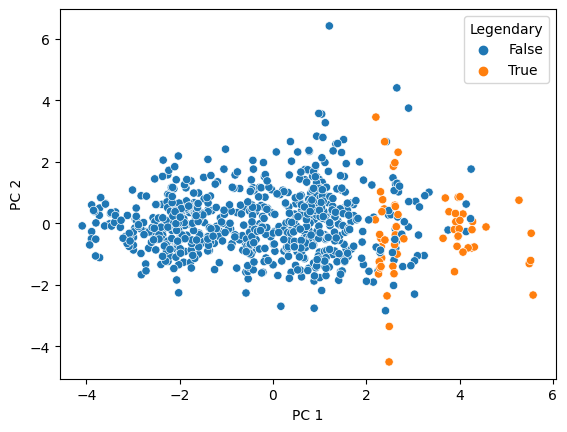

In [24]:
# Use the Type feature to color the PC 1 vs. PC 2 scatterplot
sns.scatterplot(data=df_cat, x='PC 1', y='PC 2', hue='Legendary')
plt.show()

# PCA for feature extraction

In [26]:
poke_df = df_num
poke_df['Legendary'] = df_cat.Legendary
poke_df = poke_df.drop('Total', axis=1)
poke_df.head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,45,49,49,65,65,45,False
1,60,62,63,80,80,60,False
2,80,82,83,100,100,80,False
3,80,100,123,122,120,80,False
4,39,52,43,60,50,65,False


In [30]:
X, y = poke_df.iloc[:, :-1], poke_df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [32]:
# Build the pipeline
pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('reducer', PCA(n_components=2)),
        ('classifier', RandomForestClassifier(random_state=0))])

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Score the accuracy on the test set
accuracy = pipe.score(X_test, y_test)

# Prints the explained variance ratio and accuracy
print(pipe['reducer'].explained_variance_ratio_)
print(f'{accuracy:.1%} test set accuracy')

[0.46627587 0.18333623]
96.9% test set accuracy


In [33]:
# Build the pipeline
pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('reducer', PCA(n_components=3)),
        ('classifier', RandomForestClassifier(random_state=0))])

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Score the accuracy on the test set
accuracy = pipe.score(X_test, y_test)

# Prints the explained variance ratio and accuracy
print(pipe['reducer'].explained_variance_ratio_)
print(f'{accuracy:.1%} test set accuracy')

[0.46627587 0.18333623 0.12774105]
95.6% test set accuracy
